# Static storage capacity for CO<sub>2</sub>  storage in a saline aquifer

Here we want to estimate the static storage capacity for a CO<sub>2</sub> storage in a saline aquifer. For this we use the U.S. DOE methodology (Goodmann 2011). The static storage capacity defined there as

$$G = A \cdot h \cdot \phi \cdot \rho \cdot E.$$

Here $A$ (m²) is the storage area, $h$ (m) is the hight of the storage layer, $\phi$ is the porosity of the storage layer, $\rho$ (kg/m³) is the density of CO<sub>2</sub> under storage conditions and $E$(-) is the storage efficiency coefficient.

We do not know the storage area. For this reason we calculate the static storage capacity per area as

$$\frac{G}{A} = h \cdot \phi \cdot \rho \cdot E.$$

We do not know all other parameter values, so we estimate reasonable ranges. Because we do not have additional information, we assume a uniform distribution for the parameter values. Then we can calculate static storage capacity per area by applying a Monte Carlo approach.

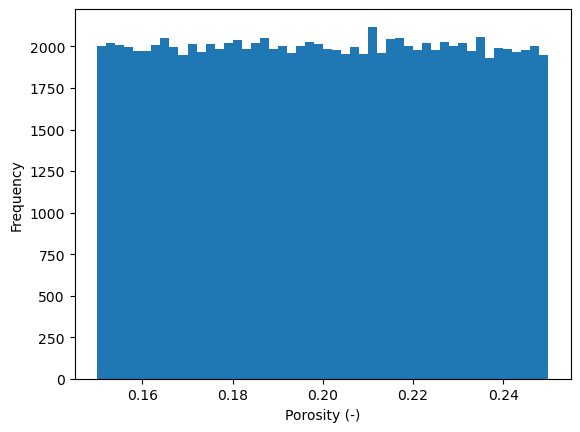

In [6]:
from scipy.stats import uniform
import matplotlib.pyplot as plt

N = 100000
nbins = 50
perc = [10, 50, 90]

param = {"E": [0.05, 0.2],          # Storage efficiency factor
         "h": [10, 20],             # hight of storage layer
         "z": [1900, 2100],         # average depth of storage layer
         "phi": [0.15, 0.25],       # porosity of storage layer
         "DT": [2.8/100, 3.2/100],  # Thermal gradient
         "rhoF": [1100, 1300]}      # average fluid density

vals = dict()
for k, v in param.items():
    vals[k] = uniform.rvs(loc=v[0], scale=v[1]-v[0], size=N)

plt.hist(vals["phi"], bins=nbins)
plt.xlabel("Porosity (-)")
plt.ylabel("Frequency")
plt.show()

Here we can see the values that are sampled for the porosity. It looks more or less normal distributed.

Let us calculate the density of CO<sub>2</sub> now. For this we estimate the pressure and the temperature in the reservoir from the bulk fluid density $\rho_F$ respecively from the thermal gradient $\Delta T$ as 

$$p = \rho_F \cdot g \cdot z$$

and

$$T = \Delta T \cdot z + T_{surf}.$$

Here $z$ (m) is the depth of the reservoir, $g$ (m/s²) is gravity and $T_{surf}$ is the average surface temperature.

With the pressure and the temperature, we can interpolate the density of CO<sub>2</sub> from tabulated NIST data.

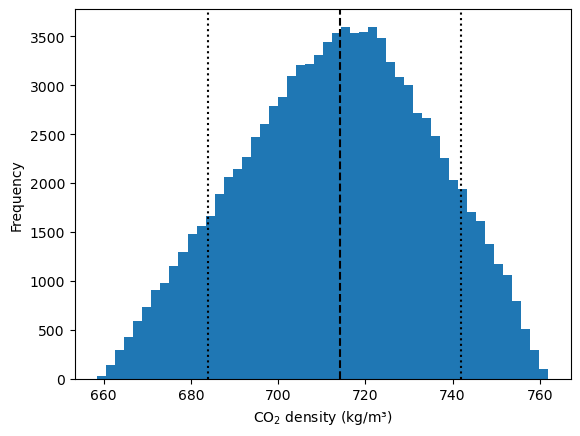

In [7]:
from properties import from_table
from numpy import percentile
import autoscale as au

g = 9.81
T_surface = 10

T = vals["DT"] * vals["z"] + T_surface  # °C
p = vals["rhoF"] * g * vals["z"] / 1e6  # MPa

rho_interpolator = from_table(plot=False)

rho = rho_interpolator(p, T)

val_perc = percentile(rho, perc)

plt.hist(rho, bins=nbins)
with au.autoscale_turned_off():
    plt.plot([val_perc[0], val_perc[0]], [0, N], 'k:')
    plt.plot([val_perc[1], val_perc[1]], [0, N], 'k--')
    plt.plot([val_perc[2], val_perc[2]], [0, N], 'k:')
plt.xlabel("CO$_2$ density (kg/m³)")
plt.ylabel("Frequency")
plt.show()

From this histogram we find, that the density of CO<sub>2</sub> in the reservoir is between 660 and 760 kg/m³. The dashed line is the 50% percentile. The dotted line is the 10% respectively the 90% percentile. 

Now we can calculate the effective storage capacity per area.

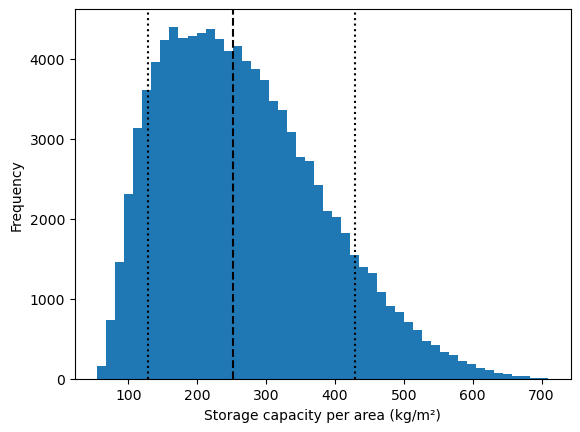

In [8]:
#G = A * h * phi * rho * E

GA = vals["h"] * vals["phi"] * rho * vals["E"]

val_perc = percentile(GA, perc)

plt.hist(GA, bins=nbins)
with au.autoscale_turned_off():
    plt.plot([val_perc[0], val_perc[0]], [0, N], 'k:')
    plt.plot([val_perc[1], val_perc[1]], [0, N], 'k--')
    plt.plot([val_perc[2], val_perc[2]], [0, N], 'k:')
plt.xlabel("Storage capacity per area (kg/m²)")
plt.ylabel("Frequency")
plt.show()

Finally we see an estimated propability function for the effective storage capacity per area. The dashed line is the 50% percentile. The dotted line is the 10% respectively the 90% percentile. 

## Literature

Goodmann, A. et. al.: U.S. DOE methodology for the development of geologic storage potential for carbon dioxide at the national and regional scale, International Journal of Greenhouse Gas Control
Volume 5, Issue 4, July 2011, Pages 952-965, https://doi.org/10.1016/j.ijggc.2011.03.010